# 六. 前馈神经网络

In [1]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
from torch import nn
from IPython import display
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import torch
import torchvision.transforms as transforms
import gzip
import numpy as np
import os
import matplotlib.pyplot as plt

## 0. 导言

神经网络是一门重要的机器学习技术，是深度学习的基础。学习神经网络不仅可以让你掌握一门强大的机器学习方法，也可以更好地帮助你理解深度学习技术。神经网络是一种模拟人脑的神经网络结构以期能够实现类人工智能的机器学习技术。人脑中的神经网络是一个非常复杂的组织，成人的大脑中估计有1000亿个神经元。

神经网络（neural network）方面的研究很早就已出现，今天的“神经网络”已经是一个相当大的、多学科交叉的学科领域。各相关学科对神经网络的定义多种多样，此处采用目前使用最广泛的一种：神经网络是由具有适应性的简单单元组成的广泛并行互联的网络，它的祖师能够模拟生物神经系统对真实世界物体所作出的交互反应(`Kohonen, 1988`)。

神经网络中最基本的成分是神经元模型，即上述定义的“简单单元”。在生物神经网络中，每个神经元与其他神经元相连，当它“兴奋”时，就会向相连的神经元发送化学物质，从而改变这些神经元内的电位；如果某个神经元的电位超过了一个“阈值”，那么它被激活，向其它神经元发送化学物质。把许多个这样的神经元按一定的层次结构连接起来，就得到了神经网络。

从计算机科学的角度看，我们暂时不考虑神经网络是否真的模拟和生物神经网络，只需将一个神经网络视为包含了许多参数的数学模型，这个模型是若干个函数相互嵌套代入而得。感知机只有输出层神经元进行激活函数处理，即只拥有一层功能神经元，学习能力非常有限，只能解决线性可分问题，例如甚至不能学习“异或”问题。要解决更加复杂的如非线性可分问题，需考虑使用多层功能神经元。


## 1. 神经网络的发展过程

- 1940年，生物学家知晓了神经元的组织结构

> 一个神经元通常具有多个树突，主要接收传入信息。轴突只有一条，轴突尾端有许多轴突末梢可以给其它多个神经元传递信息，跟其它神经元的树突产生连接，连接的问题称为“突触”。

- 1943年，心理学家McCulloch和Pitts参考了生物神经元的结构，发明了抽象的神经元模型MP

- 1949年，心理学家Hebb提出了Hebb学习率，任务人脑神经细胞的突触上的强度可以变化。因此，计算机科学家开始考虑用调整权重的方法来让机器学习，为后来的学习算法奠定了基础。

- 1958年，计算科学家Rosenbalt提出了由两层神经元组成的神经网络，取名为“Perceptron”

- 1969年，人工智能巨擘Minsky在一本叫《Perceptron》一书中，用详细的数学证明了感知机的弱点（不能解决异或问题），且认为如果将计算层增加到两层，计算量将很大，而且没有有效的学习算法，由此认为研究更深层的网络没有价值。

- 1986年，Rumelhar&Hinton等人提出反向传播算法，解决了两层神经网络（MLP）所需要的复杂计算量问题，从而带动了业界使用两层神经网络研究的热潮。10多年前困扰神经网络界的异或问题被轻松解决，神经网络在这个时候，已经可以用于语音识别、图像识别和自动驾驶等多个领域。

- 2006年，Hinton在《Science》和相关期刊上发表论文，首次提出了“深度信念网络”的概念。深度信念网络有一个“预训练(pre-training)”的过程，这可以方便的让神经网络中的权值找到一个接近最优解的值，之后再使用“微调(fine-tuning)”技术对整个网络进行优化训练。

- 2012年，Hinton与他的学生在ImageNet竞赛中，用多层的卷积神经网络成功地对包含1,000多个类别的1,000,000多张图片进行了训练，取得了分类错误率15%的好成绩，比第2名高出11个百分点。

- 神经网络在人工智能界占据统治地位：`Hinton, YannLecun, Bengio, Andrew Ng`获得2018年的图灵奖

<div align=center>
<img width="350" src="../pictures/6.neural-network-develop.jpg"/>
</div>

<div align=center> 
    图2 神经网络发展历程
</div>

## 2. 神经网络的分类

<div align=center>
<img width="700" src="../pictures/6.category of ann.svg"/>
</div>

<div align=center> 
    图3 神经网络的分类
</div>

## 3. 多层感知机

接下来，我们将以多层感知机（multilayer perceptron，MLP）为例，介绍多层神经网络的概念。

多层感知机在单层神经网络的基础上引入了一到多个隐藏层（hidden layer）。隐藏层位于输入层和输出层之间。图3.3展示了一个多层感知机的神经网络图，它含有一个隐藏层，该层中有5个隐藏单元。

<div align=center>
<img width="350" src="../pictures/6.1.svg"/>
</div>
<div align=center> 
    图3 带有隐藏层的多层感知机
</div>

图3所示的多层感知机中，输入和输出个数分别为4和3，中间的隐藏层中包含了5个隐藏单元（hidden unit）。由于输入层不涉及计算，图3中的多层感知机的层数为2。隐藏层中的神经元和输入层中各个输入完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。

具体来说，给定一个小批量样本$\boldsymbol{X} \in \mathbb{R}^{n \times d}$，其批量大小为$n$，输入个数为$d$。假设多层感知机只有一个隐藏层，其中隐藏单元个数为$h$。记隐藏层的输出（也称为隐藏层变量或隐藏变量）为$\boldsymbol{H}$，有$\boldsymbol{H} \in \mathbb{R}^{n \times h}$。

因为隐藏层和输出层均是全连接层，可以设隐藏层的权重参数和偏差参数分别为$\boldsymbol{W}_h \in \mathbb{R}^{d \times h}$和 $\boldsymbol{b}_h \in \mathbb{R}^{1 \times h}$，输出层的权重和偏差参数分别为$\boldsymbol{W}_o \in \mathbb{R}^{h \times q}$和$\boldsymbol{b}_o \in \mathbb{R}^{1 \times q}$。

我们先来看一种含单隐藏层的多层感知机的设计。其输出$\boldsymbol{O} \in \mathbb{R}^{n \times q}$的计算为

$$
\begin{aligned}
\boldsymbol{H} &= \boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h,\\
\boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o,
\end{aligned}      
$$

也就是将隐藏层的输出直接作为输出层的输入。如果将以上两个式子联立起来，可以得到

$$
\boldsymbol{O} = (\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h)\boldsymbol{W}_o + \boldsymbol{b}_o = \boldsymbol{X} \boldsymbol{W}_h\boldsymbol{W}_o + \boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o.
$$

从联立后的式子可以看出，虽然神经网络引入了隐藏层，却依然等价于一个单层神经网络：其中输出层权重参数为$\boldsymbol{W}_h\boldsymbol{W}_o$，偏差参数为$\boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o$。

不难发现，即便再添加更多的隐藏层，以上设计依然只能与仅含输出层的单层神经网络等价。


### 3.1. 激活函数

上述问题的根源在于全连接层只是对数据做仿射变换（`affine transformation`），而多个仿射变换的叠加仍然是一个仿射变换。

解决问题的一个方法是引入非线性变换，例如对隐藏变量使用按元素运算的非线性函数进行变换，然后再作为下一个全连接层的输入。这个非线性函数被称为激活函数（activation function）。下面我们介绍几个常用的激活函数。

#### a. `sigmoid`

sigmoid函数可以将元素的值变换到0和1之间：

$$\text{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

sigmoid函数在早期的神经网络中较为普遍，但它目前逐渐被更简单的ReLU函数取代。当输入接近0时，sigmoid函数接近线性变换。

In [2]:
x = np.arange(-5, 5, 0.02)
y = 1 / (1+np.exp(-x))
dy_dx = y*(1 - y)

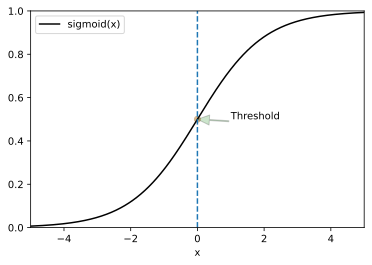

In [3]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, 'k-', label="sigmoid(x)")
ax.annotate('Threshold', xy=(0, 0.5), xytext=(1, 0.5),
            arrowprops=dict(facecolor='green', width=1, headwidth=10, alpha=0.2))
ax.scatter(0, 0.5, color='tan', marker='o')
ax.set_xlabel("x")
ax.set_xlim([-5, 5])
ax.set_ylim([0, 1])
ax.vlines(0, ymin=0, ymax=1, linestyle='--')
ax.legend()
plt.savefig("../pictures/6.sigmoid.svg")

依据链式法则，sigmoid函数的导数

$$\text{sigmoid}'(x) = \text{sigmoid}(x)\left(1-\text{sigmoid}(x)\right).$$

下面绘制了sigmoid函数的导数。当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid函数的导数越接近0。


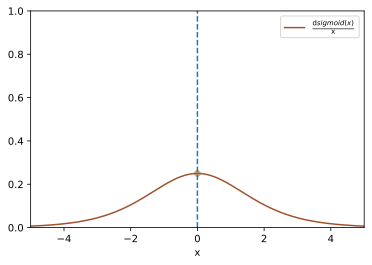

In [4]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, dy_dx, linestyle='-', color='sienna', label=r'$\frac{\mathrm{d}sigmoid(x)}{\mathrm{x}}$')
ax.scatter(0, 0.25, color='tan', marker='o')
ax.set_xlabel("x")
ax.set_xlim([-5, 5])
ax.set_ylim([0, 1])
ax.vlines(0, ymin=0, ymax=1, linestyle='--')
ax.legend()
plt.savefig("../pictures/6.sigmoid-derivate.svg")

#### b. `tanh`

tanh（双曲正切）函数可以将元素的值变换到-1和1之间：

$$\text{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

我们接着绘制tanh函数。当输入接近0时，tanh函数接近线性变换。虽然该函数的形状和sigmoid函数的形状很像，但tanh函数在坐标系的原点上对称。

In [8]:
x = np.arange(-5, 5, 0.02)
y = (1 - np.exp(-2*x)) / (1+np.exp(-2*x))
dy_dx = 1 - y**2

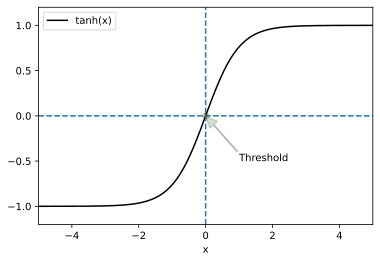

In [9]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, 'k-', label="tanh(x)")
ax.annotate('Threshold', xy=(0, 0), xytext=(1, -0.5),
            arrowprops=dict(facecolor='green', width=1, headwidth=10, alpha=0.2))
ax.scatter(0, 0, color='tan', marker='o')
ax.set_xlabel("x")
ax.set_xlim([-5, 5])
ax.set_ylim([-1.2, 1.2])
ax.vlines(0, ymin=-1.2, ymax=1.2, linestyle='--')
ax.hlines(0, xmin=-5, xmax=5, linestyle='--')
ax.legend()

plt.savefig("../pictures/6.tanh.svg")

依据链式法则，tanh函数的导数

$$\text{tanh}'(x) = 1 - \text{tanh}^2(x).$$

下面绘制了tanh函数的导数。当输入为0时，tanh函数的导数达到最大值1；当输入越偏离0时，tanh函数的导数越接近0。

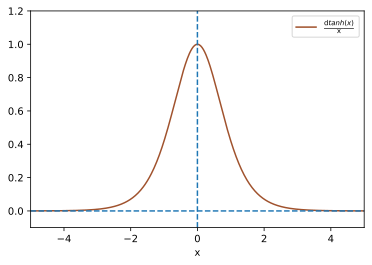

In [10]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, dy_dx, linestyle='-', color='sienna', label=r'$\frac{\mathrm{d}tanh(x)}{\mathrm{x}}$')
ax.set_xlabel("x")
ax.set_xlim([-5, 5])
ax.set_ylim([-0.1, 1.2])
ax.vlines(0, ymin=-0.1, ymax=1.2, linestyle='--')
ax.hlines(0, xmin=-5, xmax=5, linestyle='--')
ax.legend()
plt.savefig("../pictures/6.tanh-derivate.svg")

#### c. `relu`

ReLU（rectified linear unit）函数提供了一个很简单的非线性变换。给定元素$x$，该函数定义为

$$\text{ReLU}(x) = \max(x, 0).$$

可以看出，ReLU函数只保留正数元素，并将负数元素清零。

In [5]:
x = np.arange(-2, 2, 0.02)
y = x.copy()
y[x < 0] = 0
dy_dx = np.ones_like(x)
dy_dx[x >= 0] = 1
dy_dx[x < 0] = 0

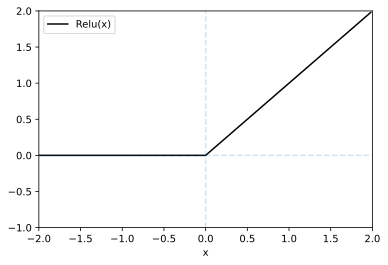

In [6]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, 'k-', label="Relu(x)")
ax.set_xlabel("x")
ax.set_xlim([-2, 2])
ax.set_ylim([-1, 2])
ax.vlines(0, ymin=-1, ymax=2, linestyle='--', alpha=0.2)
ax.hlines(0, xmin=-2, xmax=2, linestyle='--', alpha=0.2)
ax.legend()
plt.savefig("../pictures/6.relu.svg")

显然，当输入为负数时，ReLU函数的导数为0；当输入为正数时，ReLU函数的导数为1。尽管输入为0时ReLU函数不可导，但是我们可以取此处的导数为0。下面绘制ReLU函数的导数。
$$
\frac{\text{d}Relu(x)}{\text{d}x}=\begin{cases}
1,x\ge 0\\
0,x< 0
\end{cases}
$$

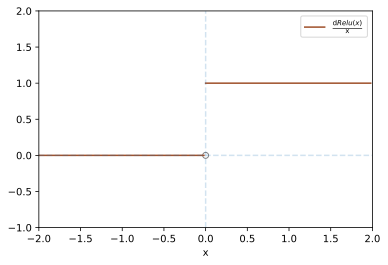

In [7]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
# ax.plot(x, y, 'k-', label="f(x)")
ax.plot(x[dy_dx==0], dy_dx[dy_dx==0], linestyle='-', color='sienna', label=r'$\frac{\mathrm{d}Relu(x)}{\mathrm{x}}$')
ax.plot(x[dy_dx==1], dy_dx[dy_dx==1], linestyle='-', color='sienna')
ax.scatter(0, 0, color='white', edgecolor='grey')
ax.set_xlabel("x")
ax.set_xlim([-2, 2])
ax.set_ylim([-1, 2])
ax.vlines(0, ymin=-1, ymax=2, linestyle='--', alpha=0.2)
ax.hlines(0, xmin=-2, xmax=2, linestyle='--', alpha=0.2)
ax.legend()
plt.savefig("../pictures/6.relu-derivate.svg")

#### d. `leakyReLU`

ReLU函数是深度学习中常用的非线性激活函数之一。它将输入中的正数元素保持不变，而将负数元素设置为 0。这种简单的设计使得 ReLU 函数在训练深度神经网络时具有较好的收敛性。

然而，ReLU 函数也存在一些缺点。例如，在输入中存在大量负数元素时，ReLU 函数会导致梯度消失。梯度消失会导致神经网络在训练过程中变得难以更新，甚至无法更新。

LeakyReLU 函数是 ReLU 函数的改进版本。它将输入中的负数元素乘以一个小常数$\alpha$，而不是直接设置为 0。这种改进可以有效地缓解梯度消失的问题。

- LeakyReLU 函数的定义如下：


\begin{align*}
\text{LeakyReLU}(x) &= \left\{
\begin{aligned}
bx &\text{, } x > 0 \\
\alpha x &\text{, } x \le 0
\end{aligned}
\right. \\
\end{align*}

其中， $\alpha$ 是一个常数，通常取值为 0.01 或 0.1。


- LeakyReLU 函数相对于 ReLU 函数具有以下优点：

    - 可以有效地缓解梯度消失问题。
    - 在训练深度神经网络时具有较好的收敛性。

- LeakyReLU 函数相对于 ReLU 函数也存在以下缺点：
    - 在输入中存在大量负数元素时，LeakyReLU 函数可能导致模型在训练过程中变得不稳定。

In [51]:
alpha = 0.01
x = np.arange(-2, 2, 0.02)
y = np.where(x > 0, x, alpha*x)

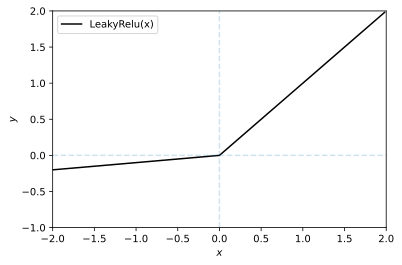

In [59]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, 'k-', label="LeakyRelu(x)")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_xlim([-2, 2])
ax.set_ylim([-1, 2])
ax.vlines(0, ymin=-1, ymax=2, linestyle='--', alpha=0.2)
ax.hlines(0, xmin=-2, xmax=2, linestyle='--', alpha=0.2)
ax.legend()

显然，当输入为负数时，LeakyReLU函数的导数为$\alpha$；当输入为正数时，leakyReLU函数的导数为1。尽管输入为0时LeakyReLU函数不可导，但是我们可以取此处的导数为0。下面绘制ReLU函数的导数。
$$
\frac{\text{d}LeakyRelu(x)}{\text{d}x}=\begin{cases}
1,x\ge 0\\
\alpha,x< 0
\end{cases}
$$

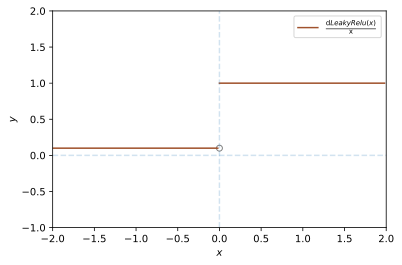

In [58]:
dLR_dx = np.where(x >= 0, 1, alpha)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x[x < 0], dLR_dx[x < 0], linestyle='-', color='sienna', label=r'$\frac{\mathrm{d}LeakyRelu(x)}{\mathrm{x}}$')
ax.plot(x[x >= 0], dLR_dx[x >= 0], linestyle='-', color='sienna')

ax.scatter(0, alpha, color='white', edgecolor='grey')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_xlim([-2, 2])
ax.set_ylim([-1, 2])
ax.vlines(0, ymin=-1, ymax=2, linestyle='--', alpha=0.2)
ax.hlines(0, xmin=-2, xmax=2, linestyle='--', alpha=0.2)
ax.legend()

#### e. `elu`

ELU(exponential linear unit) 函数是 ReLU 函数的改进版本。它将输入中的负数元素乘以一个指数常数，而不是直接设置为 0。ELU 函数具有以下特点：

* 在正数区间内，ELU 函数与 ReLU 函数相同，具有较好的非线性性。
* 在负数区间内，ELU 函数将输入乘以一个指数常数，具有较好的收敛性。
* ELU 函数不存在梯度消失的问题。


ELU 函数的定义如下：

\begin{align*}
\text{ELU}(x) &= \left\{
\begin{aligned}
x &\text{, } x \ge 0 \\
\alpha(e^x - 1) &\text{, } x < 0
\end{aligned}
\right. \\
\end{align*}

> 其中， α 是一个常数，通常取值为 0.1.


- ELU 函数相对于 ReLU 函数具有以下优点：
    * 在正数区间内，ELU 函数与 ReLU 函数相同，具有较好的非线性性。
    * 在负数区间内，ELU 函数将输入乘以一个指数常数，具有较好的收敛性。
    * ELU 函数不存在梯度消失的问题。

- ELU 函数相对于 ReLU 函数也存在以下缺点：
    * ELU 函数的计算量比 ReLU 函数略大。
    * ELU 函数可能会导致模型在训练过程中变得不稳定。

ELU 函数在深度学习中具有广泛的应用，包括图像分类、自然语言处理和机器翻译等。


In [60]:
def elu(x, alpha=0.1):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

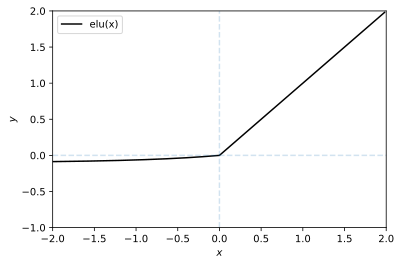

In [61]:
x = np.arange(-2, 2, 0.02)
y = elu(x)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, 'k-', label="elu(x)")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_xlim([-2, 2])
ax.set_ylim([-1, 2])
ax.vlines(0, ymin=-1, ymax=2, linestyle='--', alpha=0.2)
ax.hlines(0, xmin=-2, xmax=2, linestyle='--', alpha=0.2)
ax.legend()

显然，当输入为负数时，elu函数的导数为$\alpha e^x$；当输入为正数时，elu函数的导数为1。尽管输入为0时elu函数不可导，但是我们可以取此处的导数为0。下面绘制ReLU函数的导数。
$$
\frac{\text{d}elu(x)}{\text{d}x}=\begin{cases}
1,x\ge 0\\
\alpha e^x,x< 0
\end{cases}
$$

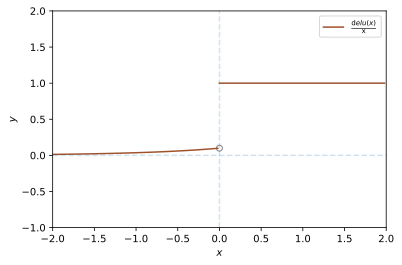

In [63]:
delu_dx = np.where(x >= 0, 1, alpha*np.exp(x))

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x[x < 0], delu_dx[x < 0], linestyle='-', color='sienna', label=r'$\frac{\mathrm{d}elu(x)}{\mathrm{x}}$')
ax.plot(x[x >= 0], delu_dx[x >= 0], linestyle='-', color='sienna')

ax.scatter(0, alpha, color='white', edgecolor='grey')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_xlim([-2, 2])
ax.set_ylim([-1, 2])
ax.vlines(0, ymin=-1, ymax=2, linestyle='--', alpha=0.2)
ax.hlines(0, xmin=-2, xmax=2, linestyle='--', alpha=0.2)
ax.legend()

#### f. `swish`

`swish(sigmoid weighted linear unit)` 函数是 ReLU 函数的改进版本。它将输入乘以一个线性函数，而不是直接设置为 0。Swish 函数具有以下特点：
- 在正数区间内，Swish 函数与 ReLU 函数相同，具有较好的非线性性。
- 在负数区间内，Swish 函数将输入乘以一个线性函数，具有较好的收敛性。
- Swish 函数不存在梯度消失的问题。

Swish 函数的定义如下：

\begin{align*}
\text{Swish}(x) &= x \cdot \text{sigmoid}(x) \\
&= x \cdot \frac{1}{1 + e^{-x}}
\end{align*}

- Swish 函数相对于 ReLU 函数具有以下优点：
    - 在正数区间内，Swish 函数与 ReLU 函数相同，具有较好的非线性性。
    - 在负数区间内，Swish 函数将输入乘以一个线性函数，具有较好的收敛性。
    - Swish 函数不存在梯度消失的问题。

- Swish 函数相对于 ReLU 函数也存在以下缺点：
    - Swish 函数的计算量比 ReLU 函数略大。
    - Swish 函数可能会导致模型在训练过程中变得不稳定。

Swish 函数在深度学习中具有广泛的应用，包括图像分类、自然语言处理和机器翻译等。


In [64]:
def swish(x):
    return x / (1 + np.exp(-x))

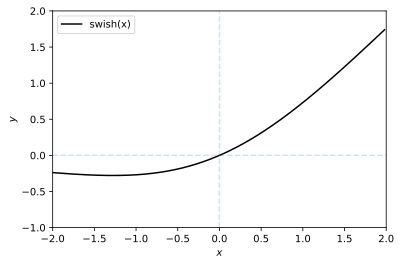

In [65]:
x = np.arange(-2, 2, 0.02)
y = swish(x)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, 'k-', label="swish(x)")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_xlim([-2, 2])
ax.set_ylim([-1, 2])
ax.vlines(0, ymin=-1, ymax=2, linestyle='--', alpha=0.2)
ax.hlines(0, xmin=-2, xmax=2, linestyle='--', alpha=0.2)
ax.legend()

Swish 函数的导为

$$
\frac{\text{d}swish(x)}{\text{d}x}=\text{sigmoid}(x)\cdot(2\cdot\text{sigmoid}(x)-1)
$$

In [66]:
def dswish(x):
    sigmoid_x = 1/(1 + np.exp(-x))
    return sigmoid_x * (2*sigmoid_x - 1)

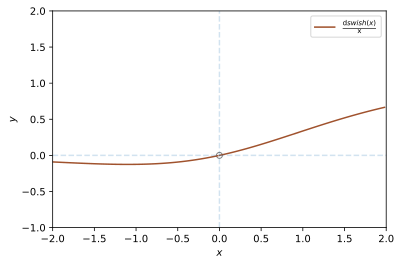

In [68]:
dswish_dx = dswish(x)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x[x < 0], dswish_dx[x < 0], linestyle='-', color='sienna', label=r'$\frac{\mathrm{d}swish(x)}{\mathrm{x}}$')
ax.plot(x[x >= 0], dswish_dx[x >= 0], linestyle='-', color='sienna')

ax.scatter(0, 0, color='white', edgecolor='grey')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_xlim([-2, 2])
ax.set_ylim([-1, 2])
ax.vlines(0, ymin=-1, ymax=2, linestyle='--', alpha=0.2)
ax.hlines(0, xmin=-2, xmax=2, linestyle='--', alpha=0.2)
ax.legend()

### 3.2. 多层感知机模型

多层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。以单隐藏层为例并沿用本节之前定义的符号，多层感知机按以下方式计算输出：

$$
\begin{aligned}
\boldsymbol{H} &= \phi(\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h),\\
\boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o,
\end{aligned}
$$
 
其中$\phi$表示激活函数。在分类问题中，我们可以对输出$\boldsymbol{O}$做softmax运算，并使用softmax回归中的交叉熵损失函数。
在回归问题中，我们将输出层的输出个数设为1，并将输出$\boldsymbol{O}$直接提供给线性回归中使用的平方损失函数。

In [11]:
def multilayer_perceptron(features, layers):
    """
    features: 输入
    layers: [(权重矩阵, 偏置向量, 激活函数), ..., ], 如果该层没有激活函数, 则应给None
    """
    y = features  # 初始化输入features
    for weight, bias, func in layers:
        z = y@weight+bias
        if func:
            if func.__name__ == 'softmax':
                y = func(z, dim=1)
            else:
                y = func(z)
        else:
            y = z
            
    return y.double()

In [12]:
features = torch.randn(1000, 5)
layers = [
    (torch.randn(5, 10), torch.tensor(0), torch.tanh),
    (torch.randn(10, 6), torch.tensor(0), torch.relu),
    (torch.randn(6, 5), torch.tensor(0), torch.softmax)
]

y = multilayer_perceptron(features, layers)

In [13]:
y.shape

torch.Size([1000, 5])

In [14]:
torch.sum(y[10])

tensor(1.0000, dtype=torch.float64)

- 交叉熵损失函数

$\text{crossEnt}=\sum_iy_i\log{\hat{y}_i}$
其中，$y$为one-hot向量, $y_i$为各类出现的概率。
> 如果y设为类别标签标量，若y=c，直接有$\text{crossEnt}=\log{y_c}$

In [15]:
def cross_entropy(y, hat_y):  # 交叉熵
    '''
    y: one-hot向量或者类别标量
    hat_y: softmax之后对应概率向量，多层感知机的输出
    '''
    if len(y.shape) == 2:
        crossEnt = -torch.dot(y.reshape(-1), torch.log10(hat_y.float()).reshape(-1)) / y.shape[0]  # 展开成1维，点积
    elif len(y.shape) == 1:
        crossEnt = -torch.mean(torch.log10(hat_y[torch.arange(y.shape[0]), y.long()]))
    else:
        print("Wrong format of y!")
    return crossEnt

In [16]:
c = torch.randint(5, size=(1000,))
hot_c = torch.zeros(1000, 5)
hot_c[np.arange(1000), c] = 1

In [17]:
cross_entropy(hot_c, y)

tensor(3.1225)

## 4. 案例

[Fashion-MNIST](https://gitee.com/mirrors/Fashion-MNIST)是一个替代[MNIST](http://yann.lecun.com/exdb/mnist/)手写数字集的图像数据集。 
它是由Zalando（一家德国的时尚科技公司）旗下的研究部门提供。其涵盖了来自10种类别的共7万个不同商品的正面图片。
Fashion-MNIST的大小、格式和训练集/测试集划分与原始的MNIST完全一致。60000/10000的训练测试数据划分，28x28的灰度图片。
你可以直接用它来测试你的机器学习和深度学习算法性能，且不需要改动任何的代码。

经典的MNIST数据集包含了大量的手写数字。十几年来，来自机器学习、机器视觉、人工智能、深度学习领域的研究员们把这个数据集作为衡量算法的基准之一。你会在很多的会议，期刊的论文中发现这个数据集的身影。实际上，MNIST数据集已经成为算法作者的必测的数据集之一。有人曾调侃道："如果一个算法在MNIST不work, 那么它就根本没法用；而如果它在MNIST上work, 它在其他数据上也可能不work！"

Fashion-MNIST的目的是要成为MNIST数据集的一个直接替代品。作为算法作者，你不需要修改任何的代码，就可以直接使用这个数据集。Fashion-MNIST的图片大小，训练、测试样本数及类别数与经典MNIST完全相同。

### 4.1 加载Fashion-MNIST数据
>推荐直接下载数据文件，pytorch有相应方法可以直接下载，但速度实在是感人，且经常断开连接。

In [18]:
label_names = ['短袖圆领T恤', '裤子', '套衫', '连衣裙', '外套', '凉鞋', '衬衫', '运动鞋','包', '短靴']
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [19]:
def load_mnist(path, kind='train'):
    """
    Load MNIST data from `path`
    """
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz'% kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)  # 4个字节（32位整数）保存magic number，后4个字节保存标签数量（60000）

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)  # 28*28， 4个字节（32位整数）保存magic number，4个字节保存图片数量，4个字节保存行数，4个字节保存列数
    
    features = transforms.ToTensor()(images)  #  Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor (h, w, c) -> (c, h, w)
    labels = torch.LongTensor(labels)

    return features[0], labels  # features取下标0是因为示例图片仅有1个通道

In [20]:
path ="../dataset/fashion_mnist"
kind='train'
labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz'% kind)
with gzip.open(labels_path, 'rb') as lbpath:
    labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

In [ ]:
labels[:100]

In [ ]:
labels[:10]

In [21]:
def load_minibatch_data(batch_size, kind='train', is_one_hot=False, is_mnist=False, path="../dataset/"):
    """
    Prepare mini batch data for training
    """
    if is_mnist:
        c_path = path + 'mnist/'
    else:
        c_path = path + 'fashion_mnist/'
    features, labels = load_mnist(c_path, kind=kind)
    
    if is_one_hot:  # 是否将标签转化为one hot向量形式
        hot_labels = torch.zeros(features.shape[0], 10)
        x_indices = np.arange(features.shape[0]).tolist()
        y_indices = labels.byte().tolist()
        hot_labels[x_indices, y_indices] = 1
        
        dataset = TensorDataset(features, hot_labels)
    else:
        dataset = TensorDataset(features, labels)

    return DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

- 将标签转换为one-hot向量

In [22]:
features, labels = load_mnist(path="../dataset/fashion_mnist")

/usr/local/python39/lib/python3.9/site-packages/torchvision/transforms/functional.py:150: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [23]:
hot_labels = torch.zeros(features.shape[0], 10)

In [ ]:
hot_labels[0, 9] = 1

In [ ]:
hot_labels[0]

In [ ]:
labels[:10]

In [24]:
x_indices = np.arange(features.shape[0]).tolist()
y_indices = labels.byte().tolist()
hot_labels[x_indices, y_indices] = 1

In [ ]:
hot_labels[:10]

In [ ]:
labels[:10]

### 4.2 准确率

In [25]:
def accuracy(y, hat_y, is_one_hot=False):
    '''
    y: 标签, one-hot
    hat_y: 标签预测概率, one-hot
    is_one_hot: y是否为one-hot形式
    '''
    if is_one_hot:
        precision = torch.sum(torch.max(y, axis=1)[1] == torch.max(hat_y, axis=1)[1]).numpy() / y.shape[0]
    else:
        precision = torch.sum((y == torch.max(hat_y, axis=1)[1]).byte()).numpy() / y.shape[0]
    return precision

In [26]:
def evaluate_accuracy(net, data_iter, is_one_hot=False):
    '''
    net: 神经网络
    data_iter: 数据迭代器
    '''
    sum_acc = 0.0
    sum_crossEnt = 0.0
    n = 0
    for X, y in data_iter:
        hat_y = net(X)
        if is_one_hot:
            acc = torch.sum(torch.max(y, axis=1)[1] == torch.max(hat_y, axis=1)[1]).item()  # .item转换为python基本数据
            crossEnt = -torch.sum(torch.dot(y.float(), torch.log2(hat_y))).item()
        else:
            acc = torch.sum((y == torch.max(hat_y, axis=1)[1]).byte()).numpy().item()
            crossEnt = -torch.sum(torch.dot(y.float(), torch.log2(hat_y[torch.arange(hat_y.shape[0]), y.long()].reshape(-1)))).item()

        sum_acc += acc
        sum_crossEnt += crossEnt
        n += X.shape[0]
    return sum_crossEnt/n, sum_acc/n

In [27]:
torch.Tensor([1]).item()

1.0

### 4.3 训练

- 方法1: 随机梯度下降

In [37]:
batch_size = 256
train_iter = load_minibatch_data(batch_size, is_one_hot=False)

In [38]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, W2, b1, b2]
for param in params:
    param.requires_grad_(requires_grad=True)

layers = [
    (W1, b1, torch.relu),
    (W2, b2, torch.softmax)
]

In [40]:
num_epoch = 40
lr = 0.1

for epoch in range(num_epoch):
    for t_x, t_y in train_iter:
        hat_y = multilayer_perceptron(t_x, layers)
        l = cross_entropy(t_y, hat_y.float())
        l.backward()  # 计算损失函数在 W 上的梯度
        for param in params:
            param.data.sub_(lr*param.grad)
            param.grad.data.zero_()
    with torch.no_grad():
        print(f'epoch {epoch + 1}, loss: {l.numpy():.4f}')

epoch 1, loss: 0.1920
epoch 2, loss: 0.2099
epoch 3, loss: 0.2374
epoch 4, loss: 0.1785
epoch 5, loss: 0.1865
epoch 6, loss: 0.1683
epoch 7, loss: 0.2158
epoch 8, loss: 0.2691
epoch 9, loss: 0.1787
epoch 10, loss: 0.1970
epoch 11, loss: 0.1275
epoch 12, loss: 0.2218
epoch 13, loss: 0.2530
epoch 14, loss: 0.1664
epoch 15, loss: 0.1875
epoch 16, loss: 0.1531
epoch 17, loss: 0.1592
epoch 18, loss: 0.1258
epoch 19, loss: 0.1788
epoch 20, loss: 0.1350
epoch 21, loss: 0.1458
epoch 22, loss: 0.1683
epoch 23, loss: 0.1882
epoch 24, loss: 0.1365
epoch 25, loss: 0.2045
epoch 26, loss: 0.1798
epoch 27, loss: 0.2321
epoch 28, loss: 0.2043
epoch 29, loss: 0.1938
epoch 30, loss: 0.1443
epoch 31, loss: 0.1616
epoch 32, loss: 0.2302
epoch 33, loss: 0.1307
epoch 34, loss: 0.1239
epoch 35, loss: 0.1543
epoch 36, loss: 0.1054
epoch 37, loss: 0.0948
epoch 38, loss: 0.2025
epoch 39, loss: 0.1316
epoch 40, loss: 0.1255


In [41]:
train_features, train_labels = load_mnist(path="../dataset/fashion_mnist", kind='train')
test_features, test_labels = load_mnist(path="../dataset/fashion_mnist", kind='t10k')

print(f'Train accuracy: {accuracy(train_labels, multilayer_perceptron(train_features, layers))}') 
print(f'Test accuracy: {accuracy(test_labels, multilayer_perceptron(test_features, layers))}') 

Train accuracy: 0.8843833333333333
Test accuracy: 0.8649


- 方法2：`torch.nn.Module`

In [32]:
class MLP(torch.nn.Module): 
    def __init__(self, feature_size, hidden_size, output_size):
        super(MLP, self).__init__() 
        self.hidden = nn.Linear(feature_size, hidden_size, bias=True)
        self.output = nn.Linear(hidden_size, output_size, bias=True)
        
    def forward(self, x):
        x = nn.functional.relu(self.hidden(x))
        x = self.output(x)
        return x

In [33]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
net = MLP(num_inputs, num_hiddens, num_outputs)
# 初始化网络参数和偏置
for params in net.parameters():
    nn.init.normal_(params, mean=0, std=0.01)
# CrossEntropyLoss包括softmax运算和交叉熵损失计算的函数, 所以输出层不应施加torch.nn.softmax()
loss = nn.CrossEntropyLoss()  
trainer = torch.optim.SGD(net.parameters(), lr=0.2)

In [34]:
batch_size = 256
train_iter2 = load_minibatch_data(batch_size, is_one_hot=False)  # nn.CrossEntropyLoss()接收标量

In [35]:
num_epochs = 30
for epoch in range(num_epochs):
    for t_x, t_y in train_iter2:
        l = loss(net(t_x), t_y)  # 计算当前批量的交叉熵损失
        trainer.zero_grad()  # 参数梯度清零
        l.backward()  # 反向传播，计算梯度
        trainer.step()  # 更新参数
        
    with torch.no_grad():  # 不计算梯度，加速损失函数的运算
        print(f"epoch {epoch+1}, loss: {l.data.numpy()},", end=' ')
        train_accuracy = accuracy(train_labels, net(train_features))
        test_accuracy = accuracy(test_labels, net(test_features))
        print(f'train_accuracy: {train_accuracy:.4f}, test_accuracy: {test_accuracy:.4f}') 

epoch 1, loss: 0.5921186804771423, train_accuracy: 0.7583, test_accuracy: 0.7486
epoch 2, loss: 0.3844449520111084, train_accuracy: 0.8342, test_accuracy: 0.8212
epoch 3, loss: 0.39465638995170593, train_accuracy: 0.7892, test_accuracy: 0.7813
epoch 4, loss: 0.43140721321105957, train_accuracy: 0.8487, test_accuracy: 0.8387
epoch 5, loss: 0.3266374170780182, train_accuracy: 0.8547, test_accuracy: 0.8426
epoch 6, loss: 0.3566833436489105, train_accuracy: 0.8537, test_accuracy: 0.8412
epoch 7, loss: 0.42600545287132263, train_accuracy: 0.8243, test_accuracy: 0.8035
epoch 8, loss: 0.4751248061656952, train_accuracy: 0.8514, test_accuracy: 0.8347
epoch 9, loss: 0.4086950123310089, train_accuracy: 0.8690, test_accuracy: 0.8498
epoch 10, loss: 0.3936643898487091, train_accuracy: 0.8709, test_accuracy: 0.8528
epoch 11, loss: 0.33170223236083984, train_accuracy: 0.8745, test_accuracy: 0.8583
epoch 12, loss: 0.5183287262916565, train_accuracy: 0.8494, test_accuracy: 0.8328
epoch 13, loss: 0.496

- 方法3：`torch.nn.Sequential`

In [42]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
net = nn.Sequential(
        nn.Linear(num_inputs, num_hiddens),
        nn.ReLU(),
        nn.Linear(num_hiddens, num_outputs), 
        )

In [43]:
for params in net.parameters():
    torch.nn.init.normal_(params, mean=0, std=0.01)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)

In [44]:
num_epochs = 30
for epoch in range(num_epochs):
    for t_x, t_y in train_iter2:
        l = loss(net(t_x), t_y)  # 计算当前批量的交叉熵损失
        optimizer.zero_grad()  # 参数梯度清零
        l.backward()  # 反向传播，计算梯度
        optimizer.step()  # 更新参数
        
    with torch.no_grad():  # 不计算梯度，加速损失函数的运算
        print(f"epoch {epoch+1}, loss: {l.data.numpy()},", end=' ')
        train_accuracy = accuracy(train_labels, net(train_features))
        test_accuracy = accuracy(test_labels, net(test_features))
        print(f'train_accuracy: {train_accuracy:.4f}, test_accuracy: {test_accuracy:.4f}') 

epoch 1, loss: 0.4995693862438202, train_accuracy: 0.7995, test_accuracy: 0.7912
epoch 2, loss: 0.5509036183357239, train_accuracy: 0.8363, test_accuracy: 0.8242
epoch 3, loss: 0.4136686325073242, train_accuracy: 0.8423, test_accuracy: 0.8272
epoch 4, loss: 0.34022942185401917, train_accuracy: 0.8503, test_accuracy: 0.8332
epoch 5, loss: 0.4301433265209198, train_accuracy: 0.8192, test_accuracy: 0.8030
epoch 6, loss: 0.3082517981529236, train_accuracy: 0.8649, test_accuracy: 0.8486
epoch 7, loss: 0.3591984808444977, train_accuracy: 0.8616, test_accuracy: 0.8425
epoch 8, loss: 0.21293328702449799, train_accuracy: 0.8772, test_accuracy: 0.8596
epoch 9, loss: 0.2869606912136078, train_accuracy: 0.8891, test_accuracy: 0.8668
epoch 10, loss: 0.315962553024292, train_accuracy: 0.8865, test_accuracy: 0.8663
epoch 11, loss: 0.23904000222682953, train_accuracy: 0.8752, test_accuracy: 0.8498
epoch 12, loss: 0.18157590925693512, train_accuracy: 0.8937, test_accuracy: 0.8707
epoch 13, loss: 0.2362

## 5. 正向传播和计算图

基于反向传播（`back-propagation`）算法的自动求梯度极大简化了深度学习模型训练算法的实现。本节我们将使用数学和计算图（`computational graph`）两个方式来描述正向传播和反向传播。具体来说，我们将以带$L_2$范数正则化的含单隐藏层的多层感知机为样例模型解释正向传播和反向传播。

#### 5.1 正向传播

正向传播是指对神经网络沿着从输入层到输出层的顺序，依次计算并存储模型的中间变量（包括输出）。为简单起见，假设输入是一个特征为$\boldsymbol{x} \in \mathbb{R}^d$的样本，且不考虑偏差项，那么中间变量

$$\boldsymbol{z} = \boldsymbol{W}^{(1)} \boldsymbol{x},$$

其中$\boldsymbol{W}^{(1)} \in \mathbb{R}^{h \times d}$是隐藏层的权重参数。把中间变量$\boldsymbol{z} \in \mathbb{R}^h$输入按元素运算的激活函数$\phi$后，将得到向量长度为$h$的隐藏层变量

$$\boldsymbol{h} = \phi (\boldsymbol{z}).$$

隐藏层变量$\boldsymbol{h}$也是一个中间变量。假设输出层参数只有权重$\boldsymbol{W}^{(2)} \in \mathbb{R}^{q \times h}$，可以得到向量长度为$q$的输出层变量

$$\boldsymbol{o} = \boldsymbol{W}^{(2)} \boldsymbol{h}.$$

假设损失函数为$\ell$，且样本标签为$y$，可以计算出单个数据样本的损失项

$$L = \ell(\boldsymbol{o}, y).$$

根据$L_2$范数正则化的定义，给定超参数$\lambda$，正则化项即

$$s = \frac{\lambda}{2} \left(\|\boldsymbol{W}^{(1)}\|_F^2 + \|\boldsymbol{W}^{(2)}\|_F^2\right),$$

其中矩阵的Frobenius范数等价于将矩阵变平为向量后计算$L_2$范数。最终，模型在给定的数据样本上带正则化的损失为

$$J = L + s.$$

我们将$J$称为有关给定数据样本的目标函数，并在以下的讨论中简称目标函数。

In [ ]:
def mean_squared_error(y, hat_y):  # 平均平方误差
    '''
    y: scalar
    hat_y: 多层感知机的输出
    '''
    return torch.mean((hat_y - y)**2)

In [ ]:
def cross_entropy(y, hat_y):  # 交叉熵
    '''
    y: one-hot向量
    hat_y: softmax之后对应概率向量，多层感知机的输出
    '''
    crossEnt = -torch.dot(y.reshape(-1), torch.log2(hat_y).reshape(-1)) / y.shape[0]  # 展开成1维，点积
    return crossEnt

### 5.2 正向传播的计算图

我们通常绘制计算图来可视化运算符和变量在计算中的依赖关系。图2绘制了本节中样例模型正向传播的计算图，其中左下角是输入，右上角是输出。可以看到，图中箭头方向大多是向右和向上，其中方框代表变量，圆圈代表运算符，箭头表示从输入到输出之间的依赖关系。

<div align=center>
<img width="400" src="../pictures/6.2.svg"/>
</div>
<div align=center> 图4 正向传播的计算图</div>

## 6. 误差反向传播

反向传播指的是计算神经网络参数梯度的方法。总的来说，反向传播依据微积分中的链式法则，沿着从输出层到输入层的顺序，依次计算并存储目标函数有关神经网络各层的中间变量以及参数的梯度。对输入或输出$\mathsf{X}, \mathsf{Y}, \mathsf{Z}$为任意形状张量的函数$\mathsf{Y}=f(\mathsf{X})$和$\mathsf{Z}=g(\mathsf{Y})$，通过链式法则，我们有

$$\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \text{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right),$$

其中$\text{prod}$运算符将根据两个输入的形状，在必要的操作（如转置和互换输入位置）后对两个输入做乘法。

回顾一下本节中样例模型，它的参数是$\boldsymbol{W}^{(1)}$和$\boldsymbol{W}^{(2)}$，因此反向传播的目标是计算$\partial J/\partial \boldsymbol{W}^{(1)}$和$\partial J/\partial \boldsymbol{W}^{(2)}$。我们将应用链式法则依次计算各中间变量和参数的梯度，其计算次序与前向传播中相应中间变量的计算次序恰恰相反。首先，分别计算目标函数$J=L+s$有关损失项$L$和正则项$s$的梯度

$$\frac{\partial J}{\partial L} = 1, \quad \frac{\partial J}{\partial s} = 1.$$

其次，依据链式法则计算目标函数有关输出层变量的梯度$\partial J/\partial \boldsymbol{o} \in \mathbb{R}^q$：

$$
\frac{\partial J}{\partial \boldsymbol{o}}
= \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \boldsymbol{o}}\right)
= \frac{\partial L}{\partial \boldsymbol{o}}.
$$


接下来，计算正则项有关两个参数的梯度：

$$\frac{\partial s}{\partial \boldsymbol{W}^{(1)}} = \lambda \boldsymbol{W}^{(1)},\quad\frac{\partial s}{\partial \boldsymbol{W}^{(2)}} = \lambda \boldsymbol{W}^{(2)}.$$

现在，我们可以计算最靠近输出层的模型参数的梯度$\partial J/\partial \boldsymbol{W}^{(2)} \in \mathbb{R}^{q \times h}$。依据链式法则，得到

$$
\frac{\partial J}{\partial \boldsymbol{W}^{(2)}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{o}}, \frac{\partial \boldsymbol{o}}{\partial \boldsymbol{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \boldsymbol{W}^{(2)}}\right)
= \frac{\partial J}{\partial \boldsymbol{o}} \boldsymbol{h}^\top + \lambda \boldsymbol{W}^{(2)}.
$$

> $\frac{\partial \boldsymbol{o}}{\partial \boldsymbol{W}^{(2)}}$为向量对矩阵的求导。
> 因为$\boldsymbol{o}={\boldsymbol{W}^{(2)}}^\top \boldsymbol{h}$, 逐元素计算$\frac{\partial \boldsymbol{o_i}}{\partial \boldsymbol{W}^{(2)}_{j,k}}$
>
> 由于$\boldsymbol{o_i}={\boldsymbol{W}^{(2)}}^\top_{i,1}\boldsymbol{h}_1+{\boldsymbol{W}^{(2)}}^\top_{i,2}\boldsymbol{h}_2+...+{\boldsymbol{W}^{(2)}}^\top_{i,k}\boldsymbol{h}_k+...+{\boldsymbol{W}^{(2)}}^\top_{i,h}\boldsymbol{h}_h$, 可得$\frac{\partial \boldsymbol{o_i}}{\partial {\boldsymbol{W}^{(2)}}^\top_{i,k}}=\boldsymbol{h}_k$. 
>
> 即, 当$j=i$时, $\frac{\partial \boldsymbol{o_i}}{\partial {\boldsymbol{W}^{(2)}}^\top_{j,k}}=\boldsymbol{h}_k$, $\frac{\partial \boldsymbol{o_i}}{\partial {\boldsymbol{W}^{(2)}}^\top_{j:}}=\boldsymbol{h}$.
> 
> 当$j\neq i$时, $\frac{\partial \boldsymbol{o_i}}{\partial {\boldsymbol{W}^{(2)}}^\top_{j,k}}=0$, $\frac{\partial \boldsymbol{o_i}}{\partial {\boldsymbol{W}^{(2)}}^\top_{j:}}=\boldsymbol{0}$.
>
> 整合成$F=[\boldsymbol{H}_1, \boldsymbol{H}_2, ..., \boldsymbol{H}_q]$, 其中$F$为3维张量, $\boldsymbol{H}_i=[\boldsymbol{0}, \boldsymbol{0}, ..., \boldsymbol{h^T}, ..., \boldsymbol{0}]^T$为矩阵, 第i行为$\boldsymbol{h}$
> 
> F可写成更加紧凑的矩阵形式$G=[\boldsymbol{h^T}, ..., \boldsymbol{h^T}, ..., \boldsymbol{h^T}]^T$


沿着输出层向隐藏层继续反向传播，隐藏层变量的梯度$\partial J/\partial \boldsymbol{h} \in \mathbb{R}^h$可以这样计算：

$$
\frac{\partial J}{\partial \boldsymbol{h}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{o}}, \frac{\partial \boldsymbol{o}}{\partial \boldsymbol{h}}\right)
= {\boldsymbol{W}^{(2)}}^\top \frac{\partial J}{\partial \boldsymbol{o}}.
$$

> $\frac{\partial \boldsymbol{o}}{\partial \boldsymbol{h}}$为向量对向量求导。因为$\boldsymbol{o}={\boldsymbol{W}^{(2)}}^\top \boldsymbol{h}$, 即需要计算$\boldsymbol{o_i}$对$\boldsymbol{h_j}$中的偏导数。
> 
> 由于$\boldsymbol{o_i}={\boldsymbol{W}^{(2)}}^\top_{i,1}\boldsymbol{h}_1+{\boldsymbol{W}^{(2)}}^\top_{i,1}\boldsymbol{h}_1+...+{\boldsymbol{W}^{(2)}}^\top_{i,j}\boldsymbol{h}_j+...+{\boldsymbol{W}^{(2)}}^\top_{i,h}\boldsymbol{h}_h$, 可得$\frac{\partial \boldsymbol{o_i}}{\partial \boldsymbol{h_j}}={\boldsymbol{W}^{(2)}}^\top_{i,j}$.
>
> 因此, 有$\frac{\partial \boldsymbol{o}}{\partial \boldsymbol{h}}={\boldsymbol{W}^{(2)}}^\top$

由于激活函数$\phi$是按元素运算的，中间变量$\boldsymbol{z}$的梯度$\partial J/\partial \boldsymbol{z} \in \mathbb{R}^h$的计算需要使用按元素乘法符$\odot$：

$$
\frac{\partial J}{\partial \boldsymbol{z}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{h}}, \frac{\partial \boldsymbol{h}}{\partial \boldsymbol{z}}\right)
= \frac{\partial J}{\partial \boldsymbol{h}} \odot \phi'\left(\boldsymbol{z}\right).
$$

最终，我们可以得到最靠近输入层的模型参数的梯度$\partial J/\partial \boldsymbol{W}^{(1)} \in \mathbb{R}^{h \times d}$。依据链式法则，得到

$$
\frac{\partial J}{\partial \boldsymbol{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{z}}, \frac{\partial \boldsymbol{z}}{\partial \boldsymbol{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \boldsymbol{W}^{(1)}}\right)
= \frac{\partial J}{\partial \boldsymbol{z}} \boldsymbol{x}^\top + \lambda \boldsymbol{W}^{(1)}
= (\phi'\left(\boldsymbol{z}\right)\odot {\boldsymbol{W}^{(2)}}^\top \frac{\partial J}{\partial \boldsymbol{o}}) \boldsymbol{x}^\top + \lambda \boldsymbol{W}^{(1)}.
$$

In [ ]:
def grad_crossentropy_w1(X, y, W1, W2):
    '''
    交叉熵对w1和w2的导数
    X: 输入, m*d
    y: 标签, m*o
    W1: 输入层至隐藏层权重矩阵, d*h
    W2: 隐藏层至输出层权重矩阵, h*o
    '''
    z = X@W1
    h = torch.sigmoid(z)
    o = h@W2
    

## 7. 训练深度学习模型
在训练深度学习模型时，正向传播和反向传播之间相互依赖。下面我们仍然以本节中的样例模型分别阐述它们之间的依赖关系。

一方面，正向传播的计算可能依赖于模型参数的当前值，而这些模型参数是在反向传播的梯度计算后通过优化算法迭代的。例如，计算正则化项$s = (\lambda/2) \left(\|\boldsymbol{W}^{(1)}\|_F^2 + \|\boldsymbol{W}^{(2)}\|_F^2\right)$依赖模型参数$\boldsymbol{W}^{(1)}$和$\boldsymbol{W}^{(2)}$的当前值，而这些当前值是优化算法最近一次根据反向传播算出梯度后迭代得到的。

另一方面，反向传播的梯度计算可能依赖于各变量的当前值，而这些变量的当前值是通过正向传播计算得到的。举例来说，参数梯度$\partial J/\partial \boldsymbol{W}^{(2)} = (\partial J / \partial \boldsymbol{o}) \boldsymbol{h}^\top + \lambda \boldsymbol{W}^{(2)}$的计算需要依赖隐藏层变量的当前值$\boldsymbol{h}$。这个当前值是通过从输入层到输出层的正向传播计算并存储得到的。

因此，在模型参数初始化完成后，我们交替地进行正向传播和反向传播，并根据反向传播计算的梯度迭代模型参数。既然我们在反向传播中使用了正向传播中计算得到的中间变量来避免重复计算，那么这个复用也导致正向传播结束后不能立即释放中间变量内存。这也是训练要比预测占用更多内存的一个重要原因。另外需要指出的是，这些中间变量的个数大体上与网络层数线性相关，每个变量的大小跟批量大小和输入个数也是线性相关的，它们是导致较深的神经网络使用较大批量训练时更容易超内存的主要原因。

## 参考资料
1. 邱锡鹏. 神经网络与机器学习. 2020.
2. [阿斯顿·张、李沐、扎卡里 C. 立顿、亚历山大 J. 斯莫拉等. 动手学深度学习. 2020.](https://github.com/d2l-ai/d2l-zh)
3. [动手学深度学习(Pytoch实现)](https://github.com/ShusenTang/Dive-into-DL-PyTorch)